# Introduction to Optimization

## Overview

Power system operators face countless decisions every day. Which generators should run? How should power flow through the network? Where should we build new transmission lines? These questions share a common structure: we want to find the *best* solution among many possibilities while respecting physical and operational constraints.

Optimization provides the mathematical framework to answer these questions systematically. This lesson introduces fundamental optimization concepts through concrete power system examples. By the end, you'll be able to recognize optimization problems in power systems and formulate them mathematically - the crucial first step toward finding solutions.

## Learning Objectives

By completing this lesson, you will be able to:

1. Recognize optimization problems in power system contexts
2. Identify decision variables, objectives, and constraints
3. Classify optimization problems by type (linear, nonlinear, integer)
4. Formulate optimization problems in standard mathematical form
5. Solve simple problems graphically to build intuition
6. Understand why problem structure affects solvability

In [34]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Polygon
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries loaded successfully")

Libraries loaded successfully


## 1. What is Optimization?

Optimization is about making the best decision given constraints. In power systems, "best" usually means minimizing cost or maximizing reliability, while constraints represent physical laws and operational limits.

Consider some power system optimization problems:

**Unit Commitment and Economic Dispatch**: Unit commitment determines which generators should be turned on. Economic dispatch, with the given online generators, determine how much electricity each should generate to minimize total cost while meeting demand.

**Transmission Planning**: Where should we build new lines to minimize investment while ensuring reliable power delivery?

**Voltage Control**: How should we adjust transformer taps and reactive power to maintain voltages within limits using minimal control actions?

Each problem involves:
- **Decisions** to be made (generator outputs, line locations, tap settings)
- An **objective** to optimize (minimize cost, maximize reliability)
- **Constraints** that must be satisfied (power balance, line limits, voltage bounds)

Let's explore a simple economic dispatch example to see these components in action.

In [35]:
# Simple economic dispatch example
# Two generators must meet 150 MW demand

# Generator data
gen_data = pd.DataFrame({
    'Generator': ['G1', 'G2'],
    'Min_MW': [20, 30],
    'Max_MW': [100, 80],
    'Cost_$/MWh': [25, 30]
})

print("Generator Characteristics:")
print(gen_data)
print(f"\nSystem demand: 150 MW")

# What are the decisions, objective, and constraints?
print("\nOptimization Components:")
print("Decisions: How much power each generator produces (P1, P2)")
print("Objective: Minimize total cost = 25*P1 + 30*P2")
print("Constraints:")
print("  - Power balance: P1 + P2 = 150")
print("  - G1 limits: 20 ≤ P1 ≤ 100")
print("  - G2 limits: 30 ≤ P2 ≤ 80")

Generator Characteristics:
  Generator  Min_MW  Max_MW  Cost_$/MWh
0        G1      20     100          25
1        G2      30      80          30

System demand: 150 MW

Optimization Components:
Decisions: How much power each generator produces (P1, P2)
Objective: Minimize total cost = 25*P1 + 30*P2
Constraints:
  - Power balance: P1 + P2 = 150
  - G1 limits: 20 ≤ P1 ≤ 100
  - G2 limits: 30 ≤ P2 ≤ 80


Without optimization, we might dispatch generators equally (75 MW each) or proportionally to their capacity. But optimization tells us to use the cheaper generator (G1) as much as possible:

- Optimal solution: P1 = 100 MW (at maximum), P2 = 50 MW
- Total cost: $25 × 100 + $30 × 50 = $4,000/hour

This saves $125/hour compared to equal dispatch. Over a year, such optimization saves millions of dollars.

## 2. Components of Optimization Problems

Every optimization problem has three essential components. Learning to identify these in problem descriptions is the key to successful formulation.

### Decision Variables

These are the quantities we control. In power systems:
- Generator outputs (MW)
- Transformer tap positions
- Line flows (in some formulations)
- Binary variables (on/off decisions)

### Objective Function

This quantifies what we want to optimize:
- Minimize: generation cost, power losses, control actions
- Maximize: social welfare, reliability, renewable integration

### Constraints

These are the requirements that must be satisfied:
- Equality constraints: power balance (generation = demand + losses)
- Inequality constraints: line flow limits, voltage bounds, generator limits
- Some constraints come from physics (Kirchhoff's laws), others from equipment ratings or operational policies

```{admonition} Exercise 1: Identify Optimization Components
:class: tip

A system operator must decide which generators to start up for tomorrow. The system has:
- 5 generators with different startup costs and minimum run times
- Hourly demand that varies from 300 MW (night) to 500 MW (day)
- A requirement to maintain 50 MW of spinning reserve at all times
- Each generator has minimum and maximum output limits when running

Identify:
1. What are the decision variables?
2. What is the objective?
3. List at least 5 types of constraints
```

In [36]:
# Exercise 1: Your answer here
# Identify the optimization components for the unit commitment problem

# Your solution:

In [37]:
# Solution
print("Unit Commitment Problem Components:")
print("\n1. Decision Variables:")
print("   - Binary variables: u[g,t] = 1 if generator g is on in hour t, 0 otherwise")
print("   - Continuous variables: p[g,t] = power output of generator g in hour t (MW)")
print("   - Binary variables: v[g,t] = 1 if generator g starts up at hour t")
print("   - Binary variables: w[g,t] = 1 if generator g shuts down at hour t")

print("\n2. Objective Function:")
print("   Minimize total cost = generation cost + startup cost")
print("   = sum over all g,t of (fuel_cost[g] * p[g,t] + startup_cost[g] * v[g,t])")

print("\n3. Constraints:")
print("   a) Power balance: sum of p[g,t] = demand[t] for all hours t")
print("   b) Reserve requirement: sum of (p_max[g] * u[g,t] - p[g,t]) >= 50 MW")
print("   c) Generator limits: p_min[g] * u[g,t] <= p[g,t] <= p_max[g] * u[g,t]")
print("   d) Minimum run time: if generator starts, must stay on for min_run_time[g] hours")
print("   e) Minimum down time: if generator stops, must stay off for min_down_time[g] hours")
print("   f) Startup/shutdown logic: v[g,t] >= u[g,t] - u[g,t-1]")
print("   g) Ramping constraints: -ramp_down[g] <= p[g,t] - p[g,t-1] <= ramp_up[g]")

print("\nThis is a mixed-integer linear program (MILP) due to binary variables.")

Unit Commitment Problem Components:

1. Decision Variables:
   - Binary variables: u[g,t] = 1 if generator g is on in hour t, 0 otherwise
   - Continuous variables: p[g,t] = power output of generator g in hour t (MW)
   - Binary variables: v[g,t] = 1 if generator g starts up at hour t
   - Binary variables: w[g,t] = 1 if generator g shuts down at hour t

2. Objective Function:
   Minimize total cost = generation cost + startup cost
   = sum over all g,t of (fuel_cost[g] * p[g,t] + startup_cost[g] * v[g,t])

3. Constraints:
   a) Power balance: sum of p[g,t] = demand[t] for all hours t
   b) Reserve requirement: sum of (p_max[g] * u[g,t] - p[g,t]) >= 50 MW
   c) Generator limits: p_min[g] * u[g,t] <= p[g,t] <= p_max[g] * u[g,t]
   d) Minimum run time: if generator starts, must stay on for min_run_time[g] hours
   e) Minimum down time: if generator stops, must stay off for min_down_time[g] hours
   f) Startup/shutdown logic: v[g,t] >= u[g,t] - u[g,t-1]
   g) Ramping constraints: -ramp_do

## 3. Types of Optimization Problems

The mathematical structure of an optimization problem determines how difficult it is to solve and what solution methods apply. Understanding these classifications helps you choose appropriate solution techniques.

### Linear vs. Nonlinear

**Linear programs (LP)** have linear objectives and constraints:
- DC optimal power flow
- Economic dispatch with linear costs
- Basic transmission planning

**Nonlinear programs (NLP)** include nonlinear relationships:
- AC optimal power flow (power flow equations are nonlinear)
- Loss minimization (losses are quadratic in current)
- Voltage optimization

### Continuous vs. Discrete

**Continuous variables** can take any value in a range:
- Generator output (e.g., 57.3 MW)
- Voltage magnitude (e.g., 1.03 per unit)

**Discrete variables** have specific allowed values:
- Binary: generator on/off, line built/not built
- Integer: number of capacitor banks, transformer tap position

### Convex vs. Non-convex

**Convex problems** have a unique global optimum:
- Linear programs are always convex
- Some specially structured nonlinear problems

**Non-convex problems** may have multiple local optima:
- AC optimal power flow
- Most problems with discrete variables

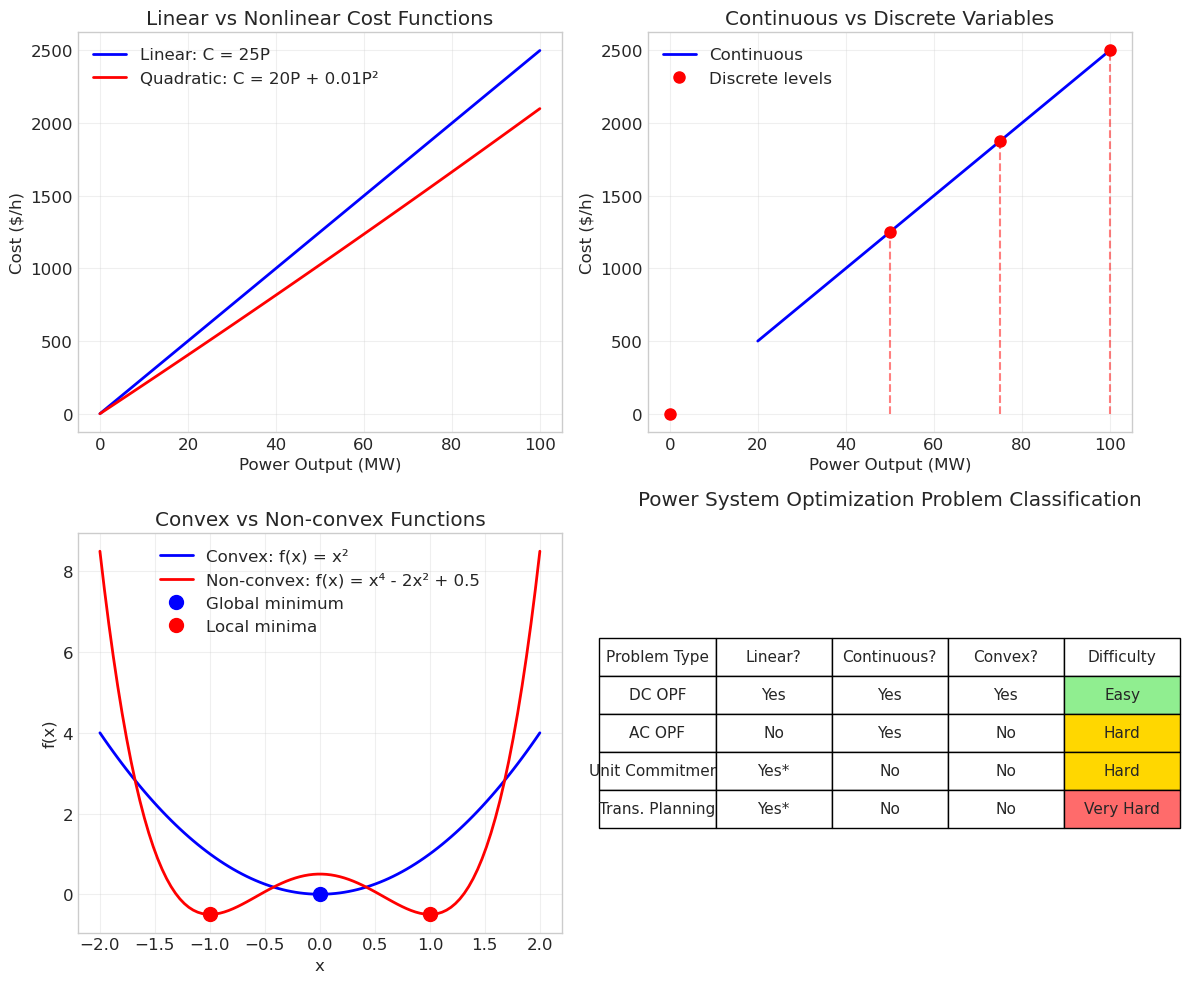

* Linear in continuous variables, but has integer variables


In [38]:
# Visualize different problem types
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Linear vs Nonlinear objective
ax = axes[0, 0]
x = np.linspace(0, 100, 100)
linear_cost = 25 * x
quadratic_cost = 20 * x + 0.01 * x**2

ax.plot(x, linear_cost, 'b-', linewidth=2, label='Linear: C = 25P')
ax.plot(x, quadratic_cost, 'r-', linewidth=2, label='Quadratic: C = 20P + 0.01P²')
ax.set_xlabel('Power Output (MW)')
ax.set_ylabel('Cost ($/h)')
ax.set_title('Linear vs Nonlinear Cost Functions')
ax.legend()
ax.grid(True, alpha=0.3)

# Continuous vs Discrete
ax = axes[0, 1]
continuous_x = np.linspace(20, 100, 100)
continuous_y = 25 * continuous_x

discrete_x = [0, 50, 75, 100]  # Discrete output levels
discrete_y = [0, 25*50, 25*75, 25*100]

ax.plot(continuous_x, continuous_y, 'b-', linewidth=2, label='Continuous')
ax.plot(discrete_x, discrete_y, 'ro', markersize=8, label='Discrete levels')
for i in range(len(discrete_x)):
    ax.plot([discrete_x[i], discrete_x[i]], [0, discrete_y[i]], 'r--', alpha=0.5)

ax.set_xlabel('Power Output (MW)')
ax.set_ylabel('Cost ($/h)')
ax.set_title('Continuous vs Discrete Variables')
ax.legend()
ax.grid(True, alpha=0.3)

# Convex vs Non-convex
ax = axes[1, 0]
x = np.linspace(-2, 2, 100)
convex = x**2
nonconvex = x**4 - 2*x**2 + 0.5

ax.plot(x, convex, 'b-', linewidth=2, label='Convex: f(x) = x²')
ax.plot(x, nonconvex, 'r-', linewidth=2, label='Non-convex: f(x) = x⁴ - 2x² + 0.5')

# Mark optima
ax.plot(0, 0, 'bo', markersize=10, label='Global minimum')
ax.plot([-1, 1], [-0.5, -0.5], 'ro', markersize=10, label='Local minima')

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Convex vs Non-convex Functions')
ax.legend()
ax.grid(True, alpha=0.3)

# Problem classification matrix
ax = axes[1, 1]
ax.axis('off')

# Create classification table
problems = [
    ['Problem Type', 'Linear?', 'Continuous?', 'Convex?', 'Difficulty'],
    ['DC OPF', 'Yes', 'Yes', 'Yes', 'Easy'],
    ['AC OPF', 'No', 'Yes', 'No', 'Hard'],
    ['Unit Commitment', 'Yes*', 'No', 'No', 'Hard'],
    ['Trans. Planning', 'Yes*', 'No', 'No', 'Very Hard']
]

# Create table
table = ax.table(cellText=problems[1:], colLabels=problems[0],
                cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 2)

# Color code by difficulty
colors = {'Easy': '#90EE90', 'Hard': '#FFD700', 'Very Hard': '#FF6B6B'}
for i in range(1, 5):
    difficulty = problems[i][4]
    table[(i, 4)].set_facecolor(colors[difficulty])

ax.set_title('Power System Optimization Problem Classification', pad=20)

plt.tight_layout()
plt.show()

print("* Linear in continuous variables, but has integer variables")

## 4. Graphical Interpretation

For problems with two variables, we can visualize the optimization process. This builds intuition for how constraints define feasible regions and how optimal solutions often lie at constraint boundaries.

Let's solve our two-generator economic dispatch problem graphically.

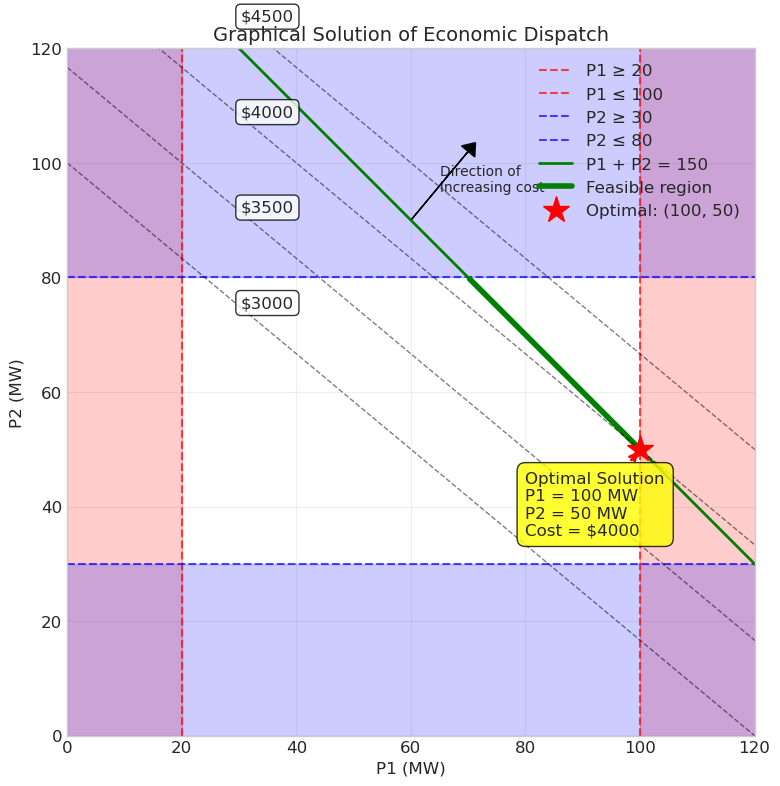

Solution Analysis:
The optimal solution occurs where the cost contour is tangent to the feasible region.
Since G1 is cheaper ($25/MWh vs $30/MWh), we use it at maximum capacity.

Optimal dispatch: P1 = 100 MW, P2 = 50 MW
Total cost: $4000/hour

Note: The solution is at the intersection of two constraints:
  - Power balance: P1 + P2 = 150
  - G1 upper limit: P1 = 100


In [39]:
# Two-generator economic dispatch visualization
# Minimize: 25*P1 + 30*P2
# Subject to: P1 + P2 = 150
#            20 <= P1 <= 100
#            30 <= P2 <= 80

fig, ax = plt.subplots(figsize=(10, 8))

# Define the feasible region
# From P1 + P2 = 150, we get P2 = 150 - P1
P1_values = np.linspace(0, 150, 300)
P2_demand = 150 - P1_values

# Plot constraints
# Generator limits
ax.axvline(x=20, color='red', linestyle='--', alpha=0.7, label='P1 ≥ 20')
ax.axvline(x=100, color='red', linestyle='--', alpha=0.7, label='P1 ≤ 100')
ax.axhline(y=30, color='blue', linestyle='--', alpha=0.7, label='P2 ≥ 30')
ax.axhline(y=80, color='blue', linestyle='--', alpha=0.7, label='P2 ≤ 80')

# Power balance constraint
ax.plot(P1_values, P2_demand, 'g-', linewidth=2, label='P1 + P2 = 150')

# Shade infeasible regions
ax.fill_between([0, 20], [0, 0], [200, 200], alpha=0.2, color='red')
ax.fill_between([100, 150], [0, 0], [200, 200], alpha=0.2, color='red')
ax.fill_between([0, 150], [0, 0], [30, 30], alpha=0.2, color='blue')
ax.fill_between([0, 150], [80, 80], [200, 200], alpha=0.2, color='blue')

# Find feasible segment of power balance line
feasible_P1 = P1_values[(P1_values >= 20) & (P1_values <= 100) & 
                       (P2_demand >= 30) & (P2_demand <= 80)]
feasible_P2 = 150 - feasible_P1

# Highlight feasible region
ax.plot(feasible_P1, feasible_P2, 'g-', linewidth=4, label='Feasible region')

# Plot cost contours (isocost lines)
# 25*P1 + 30*P2 = constant
costs = [3000, 3500, 4000, 4500]
for cost in costs:
    P1_contour = np.linspace(0, 150, 100)
    P2_contour = (cost - 25*P1_contour) / 30
    ax.plot(P1_contour, P2_contour, 'k--', alpha=0.5, linewidth=1)
    # Label the contour
    idx = 20
    if P2_contour[idx] > 0 and P2_contour[idx] < 150:
        ax.text(P1_contour[idx], P2_contour[idx], f'${cost}', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Find and mark optimal solution
# The optimal solution is where the lowest cost contour touches the feasible region
# This occurs at P1 = 100 (maximum), P2 = 50
P1_opt, P2_opt = 100, 50
cost_opt = 25 * P1_opt + 30 * P2_opt

ax.plot(P1_opt, P2_opt, 'r*', markersize=20, label=f'Optimal: ({P1_opt}, {P2_opt})')
ax.annotate(f'Optimal Solution\nP1 = {P1_opt} MW\nP2 = {P2_opt} MW\nCost = ${cost_opt}',
            xy=(P1_opt, P2_opt), xytext=(80, 35),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.8),
            fontsize=12)

# Cost gradient arrow
ax.arrow(60, 90, 10, 12, head_width=3, head_length=2, fc='black', ec='black')
ax.text(65, 95, 'Direction of\nincreasing cost', fontsize=10)

ax.set_xlim(0, 120)
ax.set_ylim(0, 120)
ax.set_xlabel('P1 (MW)', fontsize=12)
ax.set_ylabel('P2 (MW)', fontsize=12)
ax.set_title('Graphical Solution of Economic Dispatch', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

# Verify the solution
print("Solution Analysis:")
print(f"The optimal solution occurs where the cost contour is tangent to the feasible region.")
print(f"Since G1 is cheaper ($25/MWh vs $30/MWh), we use it at maximum capacity.")
print(f"\nOptimal dispatch: P1 = {P1_opt} MW, P2 = {P2_opt} MW")
print(f"Total cost: ${cost_opt}/hour")
print(f"\nNote: The solution is at the intersection of two constraints:")
print(f"  - Power balance: P1 + P2 = 150")
print(f"  - G1 upper limit: P1 = 100")

```{admonition} Exercise 2: Graphical Optimization
:class: tip

The system demand increases to 170 MW. Using the same two generators:
- G1: 20-100 MW, $25/MWh
- G2: 30-80 MW, $30/MWh

1. Is the problem still feasible?
2. What is the new optimal solution?
3. What is the marginal cost of this extra 20 MW?
```

In [40]:
# Exercise 2: Your solution here
# Analyze the system with 170 MW demand

# Your solution:

Feasibility Analysis:
Demand: 170 MW
Minimum possible generation: 50 MW
Maximum possible generation: 180 MW

Is feasible? True

Optimal solution:
P1 = 100 MW (at maximum)
P2 = 70 MW

Total cost: $4600/hour
Previous cost (150 MW): $4000/hour

Marginal cost of extra 20 MW: $600/hour
Marginal cost per MW: $30.0/MWh

Insight: The marginal cost equals G2's cost ($30/MWh) because
the additional power comes entirely from the more expensive generator.


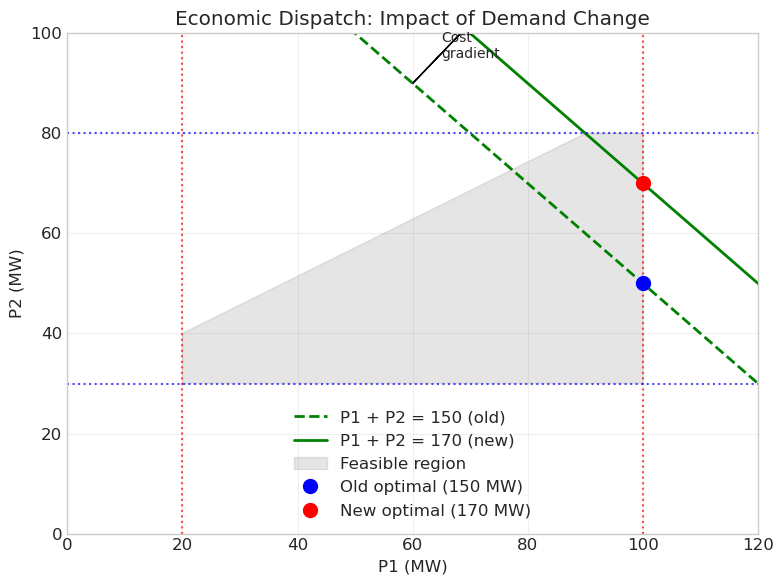

In [41]:
# Solution
demand_new = 170

# Check feasibility
max_generation = 100 + 80  # Maximum possible generation
min_generation = 20 + 30   # Minimum possible generation

print("Feasibility Analysis:")
print(f"Demand: {demand_new} MW")
print(f"Minimum possible generation: {min_generation} MW")
print(f"Maximum possible generation: {max_generation} MW")
print(f"\nIs feasible? {min_generation <= demand_new <= max_generation}")

# Find optimal solution
# Since G1 is cheaper, use it at maximum
P1_new = min(100, demand_new)  # Use G1 up to its limit
P2_new = demand_new - P1_new   # G2 provides the rest

# Check if P2 is within limits
if P2_new < 30 or P2_new > 80:
    print(f"\nProblem: P2 = {P2_new} MW is outside limits [30, 80]")
else:
    print(f"\nOptimal solution:")
    print(f"P1 = {P1_new} MW (at maximum)")
    print(f"P2 = {P2_new} MW")
    
    # Calculate costs
    cost_new = 25 * P1_new + 30 * P2_new
    cost_old = 25 * 100 + 30 * 50  # From previous problem
    
    print(f"\nTotal cost: ${cost_new}/hour")
    print(f"Previous cost (150 MW): ${cost_old}/hour")
    print(f"\nMarginal cost of extra 20 MW: ${cost_new - cost_old}/hour")
    print(f"Marginal cost per MW: ${(cost_new - cost_old)/20}/MWh")
    
    print(f"\nInsight: The marginal cost equals G2's cost (${30}/MWh) because")
    print(f"the additional power comes entirely from the more expensive generator.")

# Visualize the new solution
fig, ax = plt.subplots(figsize=(8, 6))

# Plot constraints
P1_range = np.linspace(0, 180, 100)
P2_balance_old = 150 - P1_range
P2_balance_new = 170 - P1_range

ax.plot(P1_range, P2_balance_old, 'g--', linewidth=2, label='P1 + P2 = 150 (old)')
ax.plot(P1_range, P2_balance_new, 'g-', linewidth=2, label='P1 + P2 = 170 (new)')

# Generator limits
ax.axvline(x=20, color='red', linestyle=':', alpha=0.7)
ax.axvline(x=100, color='red', linestyle=':', alpha=0.7)
ax.axhline(y=30, color='blue', linestyle=':', alpha=0.7)
ax.axhline(y=80, color='blue', linestyle=':', alpha=0.7)

# Feasible region
ax.fill([20, 100, 100, 90, 20], [30, 30, 80, 80, 40], alpha=0.2, color='gray', label='Feasible region')

# Mark solutions
ax.plot(100, 50, 'bo', markersize=10, label='Old optimal (150 MW)')
ax.plot(100, 70, 'ro', markersize=10, label='New optimal (170 MW)')

# Cost gradient
ax.arrow(60, 90, 10, 12, head_width=3, head_length=2, fc='black', ec='black')
ax.text(65, 95, 'Cost\ngradient', fontsize=10)

ax.set_xlim(0, 120)
ax.set_ylim(0, 100)
ax.set_xlabel('P1 (MW)')
ax.set_ylabel('P2 (MW)')
ax.set_title('Economic Dispatch: Impact of Demand Change')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

## 5. Mathematical Formulation

To solve optimization problems computationally, we need to express them in standard mathematical form. This systematic approach ensures we capture all aspects of the problem and prepares it for solution algorithms.

### Standard Form for Minimization

**Minimize:** $f(x)$ (objective function)

**Subject to:**
- $g_i(x) \leq 0$ for $i = 1, ..., m$ (inequality constraints)
- $h_j(x) = 0$ for $j = 1, ..., p$ (equality constraints)
- $x_l \leq x \leq x_u$ (variable bounds)

Where $x$ is the vector of decision variables.

### Converting to Standard Form

1. **Maximization to minimization**: Maximize $f(x)$ → Minimize $-f(x)$
2. **Greater-than inequalities**: $g(x) \geq b$ → $-g(x) \leq -b$
3. **Absolute values**: $|x| \leq b$ → $x \leq b$ and $-x \leq b$
4. **Ranges**: $a \leq x \leq b$ → $x \geq a$ and $x \leq b$

In [42]:
# Example: Formulating economic dispatch mathematically
print("Economic Dispatch - Mathematical Formulation")
print("="*50)

print("\nGiven data:")
print("3 generators with quadratic cost functions")
print("System demand: 400 MW")
print("Reserve requirement: 50 MW")

# Generator data
gen_data = pd.DataFrame({
    'Generator': ['G1', 'G2', 'G3'],
    'Pmin (MW)': [50, 40, 60],
    'Pmax (MW)': [200, 150, 180],
    'a ($/h)': [500, 300, 400],
    'b ($/MWh)': [20, 25, 22],
    'c ($/MW²h)': [0.02, 0.03, 0.025]
})

print("\nGenerator parameters:")
print(gen_data)
print("\nCost function: C_i(P_i) = a_i + b_i*P_i + c_i*P_i²")

print("\n" + "="*50)
print("MATHEMATICAL FORMULATION")
print("="*50)

print("\nDecision Variables:")
print("P₁, P₂, P₃ = Power output of generators 1, 2, 3 (MW)")

print("\nObjective Function:")
print("Minimize: C_total = C₁(P₁) + C₂(P₂) + C₃(P₃)")
print("        = (500 + 20P₁ + 0.02P₁²) + (300 + 25P₂ + 0.03P₂²) + (400 + 22P₃ + 0.025P₃²)")
print("        = 1200 + 20P₁ + 25P₂ + 22P₃ + 0.02P₁² + 0.03P₂² + 0.025P₃²")

print("\nConstraints:")
print("\n1. Power Balance (equality):")
print("   P₁ + P₂ + P₃ = 400")

print("\n2. Reserve Requirement (inequality):")
print("   (200 - P₁) + (150 - P₂) + (180 - P₃) ≥ 50")
print("   Simplifying: P₁ + P₂ + P₃ ≤ 480")

print("\n3. Generator Limits (bounds):")
print("   50 ≤ P₁ ≤ 200")
print("   40 ≤ P₂ ≤ 150")
print("   60 ≤ P₃ ≤ 180")

print("\n" + "="*50)
print("PROBLEM CLASSIFICATION")
print("="*50)
print("Type: Quadratic Programming (QP)")
print("- Quadratic objective function")
print("- Linear constraints")
print("- Continuous variables")
print("- Convex (positive semi-definite Hessian)")
print("\nSolution approach: Can be solved efficiently to global optimum")

Economic Dispatch - Mathematical Formulation

Given data:
3 generators with quadratic cost functions
System demand: 400 MW
Reserve requirement: 50 MW

Generator parameters:
  Generator  Pmin (MW)  Pmax (MW)  a ($/h)  b ($/MWh)  c ($/MW²h)
0        G1         50        200      500         20       0.020
1        G2         40        150      300         25       0.030
2        G3         60        180      400         22       0.025

Cost function: C_i(P_i) = a_i + b_i*P_i + c_i*P_i²

MATHEMATICAL FORMULATION

Decision Variables:
P₁, P₂, P₃ = Power output of generators 1, 2, 3 (MW)

Objective Function:
Minimize: C_total = C₁(P₁) + C₂(P₂) + C₃(P₃)
        = (500 + 20P₁ + 0.02P₁²) + (300 + 25P₂ + 0.03P₂²) + (400 + 22P₃ + 0.025P₃²)
        = 1200 + 20P₁ + 25P₂ + 22P₃ + 0.02P₁² + 0.03P₂² + 0.025P₃²

Constraints:

1. Power Balance (equality):
   P₁ + P₂ + P₃ = 400

2. Reserve Requirement (inequality):
   (200 - P₁) + (150 - P₂) + (180 - P₃) ≥ 50
   Simplifying: P₁ + P₂ + P₃ ≤ 480

3. Genera

```{admonition} Exercise 3: Problem Formulation
:class: tip

A utility must decide where to install capacitor banks to improve voltage profile. The system has:
- 5 candidate buses for capacitor installation
- Each location can have 0, 1, or 2 capacitor banks
- Each bank costs $10,000 and provides 5 MVAR
- Goal: Minimize voltage deviations from 1.0 pu while limiting cost to $50,000

Formulate this as an optimization problem. Identify:
1. Decision variables and their type
2. Objective function
3. All constraints
4. Problem classification
```

In [43]:
# Exercise 3: Your solution here
# Formulate the capacitor placement problem

# Your solution:

Capacitor Placement Problem Formulation

1. DECISION VARIABLES:
   n_i = Number of capacitor banks at bus i (i = 1, 2, 3, 4, 5)
   Type: Integer variables with n_i ∈ {0, 1, 2}

   Note: These will determine reactive power injection:
   Q_i = 5 * n_i MVAR at each bus

2. OBJECTIVE FUNCTION:
   Minimize: sum over all buses k of |V_k - 1.0|²

   Where V_k depends on capacitor placement through power flow equations:
   V_k = f(n_1, n_2, n_3, n_4, n_5)

   This is a nonlinear objective because voltage magnitudes depend
   nonlinearly on reactive power injections.

3. CONSTRAINTS:

   a) Budget constraint:
      10000 * (n_1 + n_2 + n_3 + n_4 + n_5) ≤ 50000
      Simplifying: n_1 + n_2 + n_3 + n_4 + n_5 ≤ 5

   b) Installation limits:
      0 ≤ n_i ≤ 2 for all i
      n_i integer for all i

   c) Power flow constraints (implicit):
      Power flow equations must be satisfied
      These relate voltages to power injections

   d) Voltage limits (optional):
      0.95 ≤ V_k ≤ 1.05 for all buse

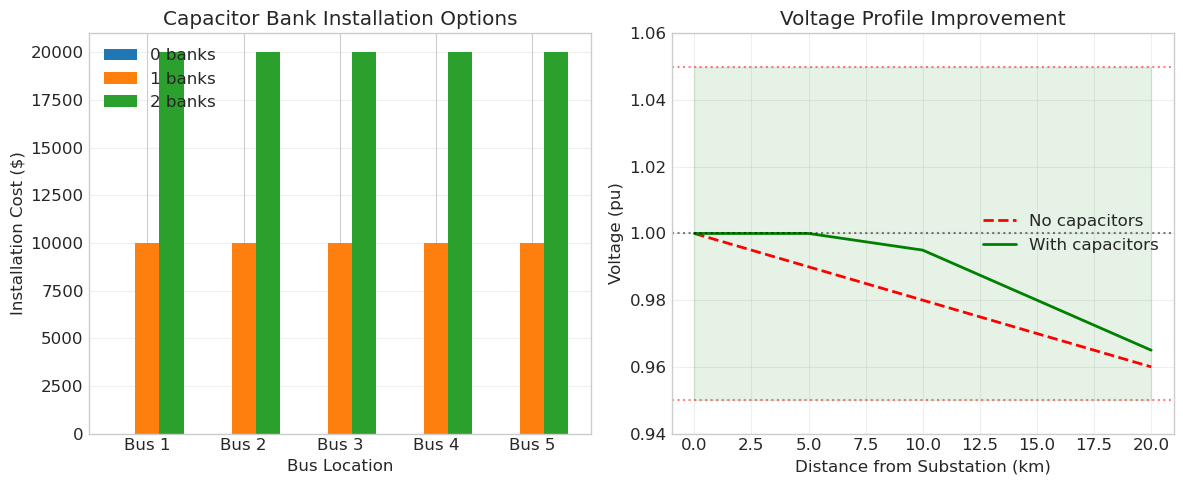

In [44]:
# Solution
print("Capacitor Placement Problem Formulation")
print("="*50)

print("\n1. DECISION VARIABLES:")
print("   n_i = Number of capacitor banks at bus i (i = 1, 2, 3, 4, 5)")
print("   Type: Integer variables with n_i ∈ {0, 1, 2}")
print("\n   Note: These will determine reactive power injection:")
print("   Q_i = 5 * n_i MVAR at each bus")

print("\n2. OBJECTIVE FUNCTION:")
print("   Minimize: sum over all buses k of |V_k - 1.0|²")
print("\n   Where V_k depends on capacitor placement through power flow equations:")
print("   V_k = f(n_1, n_2, n_3, n_4, n_5)")
print("\n   This is a nonlinear objective because voltage magnitudes depend")
print("   nonlinearly on reactive power injections.")

print("\n3. CONSTRAINTS:")
print("\n   a) Budget constraint:")
print("      10000 * (n_1 + n_2 + n_3 + n_4 + n_5) ≤ 50000")
print("      Simplifying: n_1 + n_2 + n_3 + n_4 + n_5 ≤ 5")

print("\n   b) Installation limits:")
print("      0 ≤ n_i ≤ 2 for all i")
print("      n_i integer for all i")

print("\n   c) Power flow constraints (implicit):")
print("      Power flow equations must be satisfied")
print("      These relate voltages to power injections")

print("\n   d) Voltage limits (optional):")
print("      0.95 ≤ V_k ≤ 1.05 for all buses k")

print("\n4. PROBLEM CLASSIFICATION:")
print("   Type: Mixed-Integer Nonlinear Program (MINLP)")
print("   - Integer decision variables (n_i)")
print("   - Nonlinear objective (voltage deviations)")
print("   - Mix of linear and nonlinear constraints")
print("   - Non-convex due to power flow equations")

print("\n5. SOLUTION APPROACH:")
print("   This is a challenging problem class. Approaches include:")
print("   - Enumerate all feasible integer combinations (5 buses × 3 options = 243 cases)")
print("   - Use MINLP solvers with branch-and-bound")
print("   - Approximate with linear power flow models")
print("   - Use metaheuristics (genetic algorithms, particle swarm)")

# Visualize the problem structure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left: Show possible configurations
buses = ['Bus 1', 'Bus 2', 'Bus 3', 'Bus 4', 'Bus 5']
configs = [0, 1, 2]  # Possible number of banks

x = np.arange(len(buses))
width = 0.25

for i, config in enumerate(configs):
    costs = [10000 * config] * len(buses)
    ax1.bar(x + i*width, costs, width, label=f'{config} banks')

ax1.set_xlabel('Bus Location')
ax1.set_ylabel('Installation Cost ($)')
ax1.set_title('Capacitor Bank Installation Options')
ax1.set_xticks(x + width)
ax1.set_xticklabels(buses)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Right: Show example voltage improvement
# Simulated voltage profiles
bus_distance = np.array([0, 5, 10, 15, 20])  # km from substation
v_no_cap = 1.0 - 0.002 * bus_distance  # Voltage drop without capacitors
v_with_cap = 1.0 - 0.002 * bus_distance + np.array([0, 0.01, 0.015, 0.01, 0.005])  # With capacitors

ax2.plot(bus_distance, v_no_cap, 'r--', linewidth=2, label='No capacitors')
ax2.plot(bus_distance, v_with_cap, 'g-', linewidth=2, label='With capacitors')
ax2.axhline(y=1.0, color='black', linestyle=':', alpha=0.5)
ax2.axhline(y=0.95, color='red', linestyle=':', alpha=0.5)
ax2.axhline(y=1.05, color='red', linestyle=':', alpha=0.5)

ax2.fill_between([0, 20], [0.95, 0.95], [1.05, 1.05], alpha=0.1, color='green')
ax2.set_xlabel('Distance from Substation (km)')
ax2.set_ylabel('Voltage (pu)')
ax2.set_title('Voltage Profile Improvement')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0.94, 1.06)

plt.tight_layout()
plt.show()

## 6. Solution Concepts

Understanding key solution concepts helps interpret optimization results and diagnose problems.

### Feasibility vs. Optimality

**Feasible solution**: Satisfies all constraints but may not be optimal
**Optimal solution**: Feasible and achieves the best objective value
**Infeasible problem**: No solution satisfies all constraints

### Local vs. Global Optima

**Local optimum**: Best solution in a neighborhood
**Global optimum**: Best solution overall
- Convex problems have only global optima
- Non-convex problems may have multiple local optima

### Sensitivity Analysis

How does the solution change if we perturb:
- Objective coefficients (e.g., fuel prices)
- Constraint bounds (e.g., transmission limits)
- Problem data (e.g., demand forecasts)

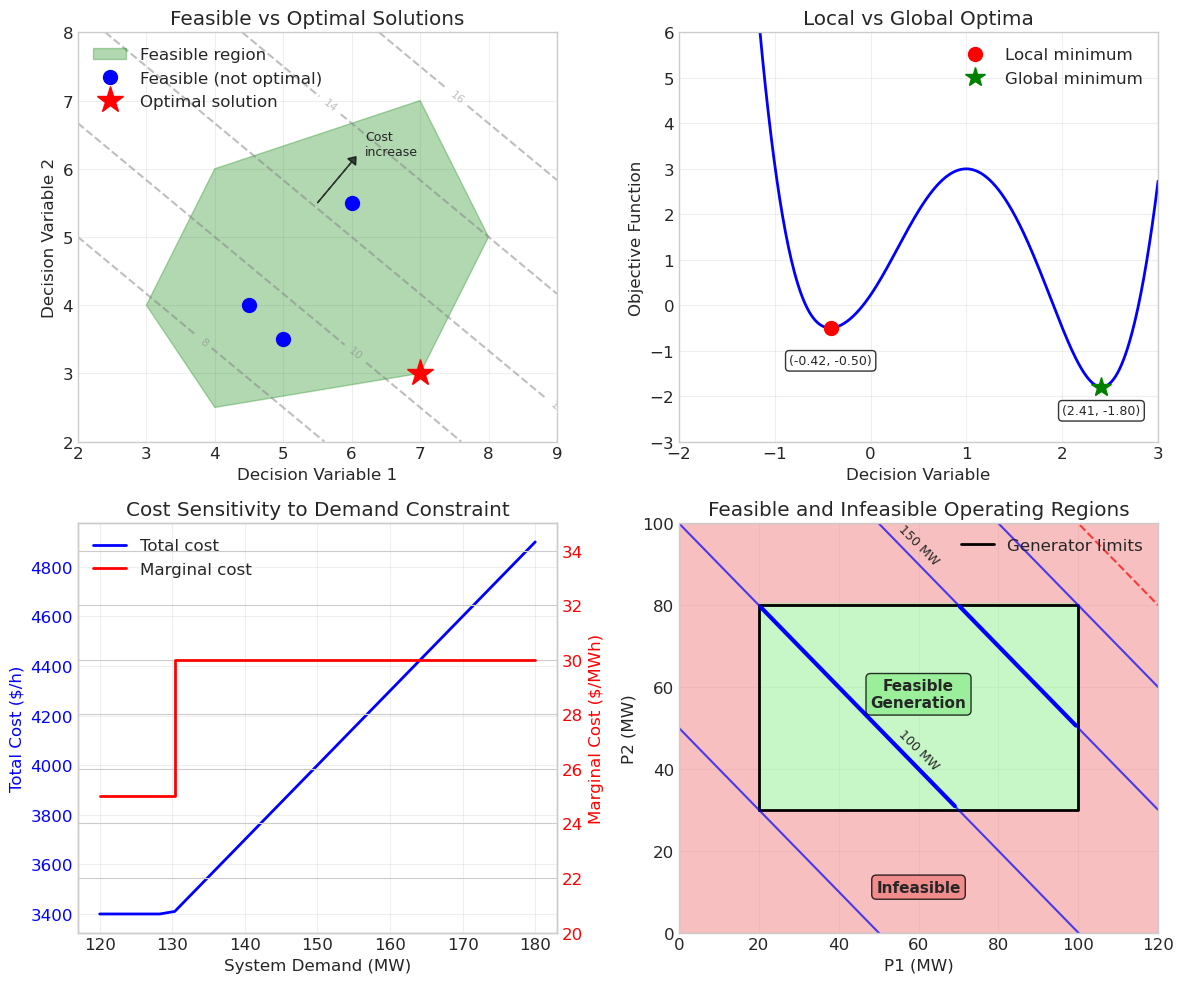

In [45]:
from matplotlib.patches import Polygon
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 12

# Create the main figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ============================================================================
# SUBPLOT 1: Feasible vs Optimal
# ============================================================================
ax = axes[0, 0]

# Create a more realistic feasible region using vertices
vertices = np.array([[3, 4], [4, 6], [7, 7], [8, 5], [7, 3], [4, 2.5], [3, 4]])
x = vertices[:, 0]
y = vertices[:, 1]

# Fill feasible region
polygon = Polygon(vertices[:-1], alpha=0.3, color='green', label='Feasible region')
ax.add_patch(polygon)

# Plot feasible points (not optimal)
ax.plot(4.5, 4, 'bo', markersize=10, label='Feasible (not optimal)')
ax.plot(6, 5.5, 'bo', markersize=10)
ax.plot(5, 3.5, 'bo', markersize=10)

# Plot optimal point (at a vertex)
ax.plot(7, 3, 'r*', markersize=20, label='Optimal solution')

# Cost contours (minimize x + 1.2y)
x_cont = np.linspace(2, 9, 20)
y_cont = np.linspace(2, 8, 20)
X, Y = np.meshgrid(x_cont, y_cont)
Z = X + 1.2*Y  # Linear cost function
levels = [8, 10, 12, 14, 16]
contours = ax.contour(X, Y, Z, levels=levels, colors='gray', alpha=0.5, linestyles='--')
ax.clabel(contours, inline=True, fontsize=8)

# Add cost gradient arrow
ax.arrow(5.5, 5.5, 0.5, 0.6, head_width=0.15, head_length=0.1, 
         fc='black', ec='black', alpha=0.7)
ax.text(6.2, 6.2, 'Cost\nincrease', fontsize=9)

ax.set_xlabel('Decision Variable 1')
ax.set_ylabel('Decision Variable 2')
ax.set_title('Feasible vs Optimal Solutions')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(2, 9)
ax.set_ylim(2, 8)

# ============================================================================
# SUBPLOT 2: Local vs Global Optima
# ============================================================================
ax = axes[0, 1]

x = np.linspace(-2, 3, 500)
# Create a function with distinct local and global minima
# Using a combination of polynomial and exponential to ensure different depths
# This creates a local minimum around x=-0.4 and a deeper global minimum around x=2.4
# The base polynomial has two minima at the same depth, so we add exponential
# perturbations to make them distinct
y = x**4 - 4*x**3 + 2*x**2 + 4*x + 0.5*np.exp(-5*(x+0.4)**2) - 0.8*np.exp(-3*(x-2.4)**2)

ax.plot(x, y, 'b-', linewidth=2)

# Find approximate minima in the modified function
local_min_idx = np.argmin(y[:180])  # Search in left portion (x < 0)
global_min_idx = np.argmin(y)  # Search entire range

local_min_x = x[local_min_idx]
local_min_y = y[local_min_idx]
global_min_x = x[global_min_idx]
global_min_y = y[global_min_idx]

# Plot the minima
ax.plot(local_min_x, local_min_y, 'ro', markersize=10, label=f'Local minimum')
ax.plot(global_min_x, global_min_y, 'g*', markersize=15, label=f'Global minimum')

# Add text labels with values, no arrows
# Local minimum label: positioned below the point
ax.text(local_min_x, local_min_y-0.8, f'({local_min_x:.2f}, {local_min_y:.2f})', 
        ha='center', fontsize=9, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
# Global minimum label: positioned below the point
ax.text(global_min_x, global_min_y-0.6, f'({global_min_x:.2f}, {global_min_y:.2f})', 
        ha='center', fontsize=9, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax.set_xlabel('Decision Variable')
ax.set_ylabel('Objective Function')
ax.set_title('Local vs Global Optima')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim(-2, 3)
ax.set_ylim(-3, 6)

# ============================================================================
# SUBPLOT 3: Cost Sensitivity to Demand Constraint
# ============================================================================
ax = axes[1, 0]

demands = np.linspace(120, 180, 30)
costs = []
marginal_costs = []

for d in demands:
    if d <= 180:  # Feasible
        # Optimal dispatch with two generators
        # G1: 20-100 MW at $25/MWh
        # G2: 30-80 MW at $30/MWh
        if d <= 50:  # Below minimum
            costs.append(np.nan)
            marginal_costs.append(np.nan)
        elif d <= 100:  # Only G1 needed (if G2 at min)
            # Must have G2 at minimum 30 MW
            costs.append(np.nan)
            marginal_costs.append(np.nan)
        elif d <= 130:  # G1 maxed, G2 at minimum
            P1 = 100
            P2 = 30
            if P1 + P2 >= d:
                cost = 25 * 100 + 30 * 30
                costs.append(cost)
                marginal_costs.append(25)
            else:
                costs.append(np.nan)
                marginal_costs.append(np.nan)
        else:  # Both generators active
            P1 = 100  # Use cheaper G1 at max
            P2 = d - 100
            if P2 <= 80 and P2 >= 30:
                cost = 25 * P1 + 30 * P2
                costs.append(cost)
                marginal_costs.append(30)
            else:
                costs.append(np.nan)
                marginal_costs.append(np.nan)

# Clean data for plotting
valid_indices = ~np.isnan(costs)
valid_demands = demands[valid_indices]
valid_costs = np.array(costs)[valid_indices]
valid_marginal = np.array(marginal_costs)[valid_indices]

ax.plot(valid_demands, valid_costs, 'b-', linewidth=2, label='Total cost')
ax.set_xlabel('System Demand (MW)')
ax.set_ylabel('Total Cost ($/h)', color='blue')
ax.set_title('Cost Sensitivity to Demand Constraint')
ax.tick_params(axis='y', labelcolor='blue')
ax.grid(True, alpha=0.3)

# Add marginal cost on second y-axis
ax2 = ax.twinx()
ax2.step(valid_demands, valid_marginal, 'r-', linewidth=2, where='post', label='Marginal cost')
ax2.set_ylabel('Marginal Cost ($/MWh)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(20, 35)

# Add legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# ============================================================================
# SUBPLOT 4: Feasible and Infeasible Operating Regions
# ============================================================================
ax = axes[1, 1]

# Create grid for shading
P1_range = np.linspace(0, 120, 100)
P2_range = np.linspace(0, 100, 100)
P1_grid, P2_grid = np.meshgrid(P1_range, P2_range)

# Define feasible generation region (considering generator limits)
# G1: 20-100 MW, G2: 30-80 MW
feasible_gen = ((P1_grid >= 20) & (P1_grid <= 100) & 
                (P2_grid >= 30) & (P2_grid <= 80))

# Shade regions
ax.contourf(P1_grid, P2_grid, feasible_gen.astype(float), 
            levels=[0, 0.5, 1], colors=['lightcoral', 'lightgreen'], alpha=0.5)

# Draw generator limit box
rect_x = [20, 100, 100, 20, 20]
rect_y = [30, 30, 80, 80, 30]
ax.plot(rect_x, rect_y, 'k-', linewidth=2, label='Generator limits')

# Plot demand constraint lines
for demand in [50, 100, 150, 180, 200]:
    P1_line = np.linspace(0, 120, 100)
    P2_line = demand - P1_line
    
    # Determine line style based on feasibility
    if demand <= 180:
        ax.plot(P1_line, P2_line, 'b-', linewidth=1.5, alpha=0.7)
        # Find intersection with feasible region
        feasible_pts = ((P1_line >= 20) & (P1_line <= 100) & 
                       (P2_line >= 30) & (P2_line <= 80))
        if feasible_pts.any():
            P1_feas = P1_line[feasible_pts]
            P2_feas = P2_line[feasible_pts]
            ax.plot(P1_feas, P2_feas, 'b-', linewidth=3)
    else:
        ax.plot(P1_line, P2_line, 'r--', linewidth=1.5, alpha=0.7)
    
    # Add demand labels
    label_x = 60
    label_y = demand - label_x
    if 0 <= label_y <= 100:
        ax.text(label_x, label_y, f'{demand} MW', 
                rotation=-45, fontsize=9, ha='center')

ax.set_xlim(0, 120)
ax.set_ylim(0, 100)
ax.set_xlabel('P1 (MW)')
ax.set_ylabel('P2 (MW)')
ax.set_title('Feasible and Infeasible Operating Regions')

# Add text labels for regions
ax.text(60, 55, 'Feasible\nGeneration', ha='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))
ax.text(60, 10, 'Infeasible', ha='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8))

ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')

# Finalize and save the figure
plt.tight_layout()
plt.show()

```{admonition} Exercise 4: Transmission Planning Formulation
:class: tip

A utility is planning transmission expansion. They have:
- 3 existing buses with generators
- 2 new load centers to connect
- 4 possible transmission corridors
- Each line costs $1M per mile
- Must ensure all loads can be served even with any single line outage (N-1)

Formulate this as an optimization problem:
1. What makes this problem particularly challenging?
2. What type of optimization problem is this?
3. Write the objective and key constraints
```

In [46]:
# Exercise 4: Your solution here
# Formulate the transmission planning problem

# Your solution:

Transmission Planning Problem Formulation
Possible transmission corridors:
  Corridor  From     To  Distance (miles)  Capacity (MW)
0       C1  Gen1  Load1                50            200
1       C2  Gen2  Load1                40            200
2       C3  Gen3  Load2                60            200
3       C4  Gen1  Load2                80            200

1. WHAT MAKES THIS CHALLENGING:
   a) Combinatorial nature: 2^4 = 16 possible network configurations
   b) N-1 security: Must check all contingencies for each configuration
   c) Power flow coupling: Line flows depend on entire network topology
   d) Long-term uncertainty: Load growth, generation changes
   e) Discrete decisions: Can't build 'half a line'

2. PROBLEM TYPE:
   Mixed-Integer Linear Program (MILP) if using DC power flow
   - Binary variables for line construction decisions
   - Linear power flow constraints (DC approximation)
   - Multiple scenarios for contingencies

3. MATHEMATICAL FORMULATION:

Decision Variables:


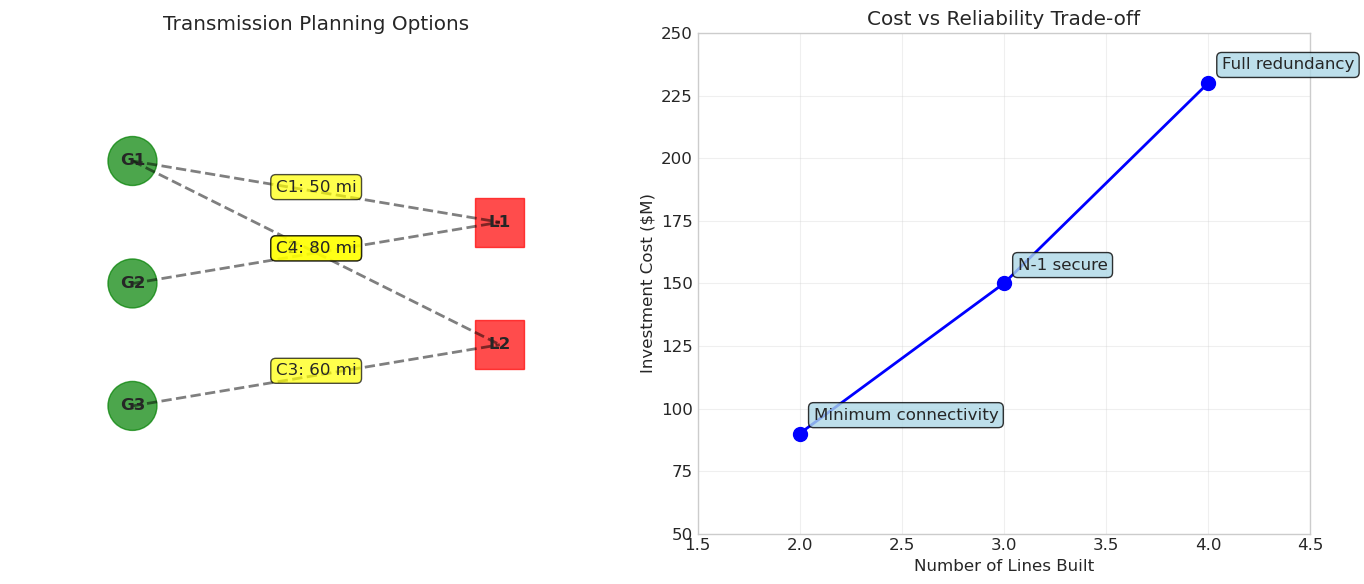


SOLUTION APPROACH:
1. Enumerate all 2^4 = 16 possible network configurations
2. For each configuration, check N-1 security
3. Select cheapest configuration that meets all constraints

For larger systems, use MILP solvers with branch-and-bound


In [47]:
# Solution
print("Transmission Planning Problem Formulation")
print("="*60)

# Problem data
corridors = pd.DataFrame({
    'Corridor': ['C1', 'C2', 'C3', 'C4'],
    'From': ['Gen1', 'Gen2', 'Gen3', 'Gen1'],
    'To': ['Load1', 'Load1', 'Load2', 'Load2'],
    'Distance (miles)': [50, 40, 60, 80],
    'Capacity (MW)': [200, 200, 200, 200]
})

print("Possible transmission corridors:")
print(corridors)

print("\n1. WHAT MAKES THIS CHALLENGING:")
print("   a) Combinatorial nature: 2^4 = 16 possible network configurations")
print("   b) N-1 security: Must check all contingencies for each configuration")
print("   c) Power flow coupling: Line flows depend on entire network topology")
print("   d) Long-term uncertainty: Load growth, generation changes")
print("   e) Discrete decisions: Can't build 'half a line'")

print("\n2. PROBLEM TYPE:")
print("   Mixed-Integer Linear Program (MILP) if using DC power flow")
print("   - Binary variables for line construction decisions")
print("   - Linear power flow constraints (DC approximation)")
print("   - Multiple scenarios for contingencies")

print("\n3. MATHEMATICAL FORMULATION:")
print("\nDecision Variables:")
print("   x_i = 1 if corridor i is built, 0 otherwise (i = 1,2,3,4)")
print("   f_ij^s = Power flow on line from i to j in scenario s")
print("   g_i^s = Generation at bus i in scenario s")

print("\nObjective Function:")
print("   Minimize: Investment Cost")
print("   = 1,000,000 × (50×x₁ + 40×x₂ + 60×x₃ + 80×x₄)")

print("\nConstraints:")
print("\n   a) Power balance at each bus in each scenario:")
print("      sum of flows in - sum of flows out + generation = load")

print("\n   b) Flow limits on built lines:")
print("      -200×x_i ≤ f_i^s ≤ 200×x_i for each corridor i and scenario s")
print("      (If line not built, flow must be zero)")

print("\n   c) Generation limits:")
print("      0 ≤ g_i^s ≤ G_max_i for each generator i")

print("\n   d) Connectivity requirement:")
print("      Each load must be connected to at least one generator")
print("      For Load1: x₁ + x₂ ≥ 1")
print("      For Load2: x₃ + x₄ ≥ 1")

print("\n   e) N-1 security (key constraint):")
print("      All demands must be met in scenarios where any one line is out")
print("      This creates |lines| + 1 scenarios to consider")

print("\n   f) DC power flow physics:")
print("      Flows must satisfy Kirchhoff's laws (linear with DC approximation)")

# Visualize the planning problem
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Network diagram
ax1.set_xlim(-1, 4)
ax1.set_ylim(-1, 3)

# Buses
gen_pos = [(0, 2), (0, 1), (0, 0)]
load_pos = [(3, 1.5), (3, 0.5)]

# Draw generators
for i, (x, y) in enumerate(gen_pos):
    ax1.add_patch(plt.Circle((x, y), 0.2, color='green', alpha=0.7))
    ax1.text(x, y, f'G{i+1}', ha='center', va='center', fontweight='bold')

# Draw loads
for i, (x, y) in enumerate(load_pos):
    ax1.add_patch(plt.Rectangle((x-0.2, y-0.2), 0.4, 0.4, color='red', alpha=0.7))
    ax1.text(x, y, f'L{i+1}', ha='center', va='center', fontweight='bold')

# Draw possible lines
line_data = [
    (gen_pos[0], load_pos[0], 'C1: 50 mi'),
    (gen_pos[1], load_pos[0], 'C2: 40 mi'),
    (gen_pos[2], load_pos[1], 'C3: 60 mi'),
    (gen_pos[0], load_pos[1], 'C4: 80 mi')
]

for (start, end, label) in line_data:
    ax1.plot([start[0], end[0]], [start[1], end[1]], 'k--', alpha=0.5, linewidth=2)
    mid_x = (start[0] + end[0]) / 2
    mid_y = (start[1] + end[1]) / 2
    ax1.text(mid_x, mid_y, label, ha='center', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

ax1.set_title('Transmission Planning Options')
ax1.set_aspect('equal')
ax1.axis('off')

# Cost vs reliability trade-off
ax2.set_xlabel('Number of Lines Built')
ax2.set_ylabel('Investment Cost ($M)')

# Example solutions
solutions = [
    (2, 90, 'Minimum connectivity'),
    (3, 150, 'N-1 secure'),
    (4, 230, 'Full redundancy')
]

x_vals = [s[0] for s in solutions]
y_vals = [s[1] for s in solutions]
labels = [s[2] for s in solutions]

ax2.plot(x_vals, y_vals, 'bo-', markersize=10, linewidth=2)
for x, y, label in solutions:
    ax2.annotate(label, (x, y), xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

ax2.set_title('Cost vs Reliability Trade-off')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(1.5, 4.5)
ax2.set_ylim(50, 250)

plt.tight_layout()
plt.show()

print("\nSOLUTION APPROACH:")
print("1. Enumerate all 2^4 = 16 possible network configurations")
print("2. For each configuration, check N-1 security")
print("3. Select cheapest configuration that meets all constraints")
print("\nFor larger systems, use MILP solvers with branch-and-bound")

```{admonition} Exercise 5: Complete Problem Formulation
:class: tip

An independent power producer wants to optimize the operation of their portfolio:
- 2 gas turbines: 50 MW each, $40/MWh operating cost, 5-minute start time
- 1 coal plant: 200 MW, $25/MWh, 4-hour start time, minimum 100 MW when on
- 1 battery: 20 MW / 80 MWh capacity, 90% round-trip efficiency
- Must provide 150 MW firm capacity during peak hours (3-7 PM)
- Energy prices vary hourly based on market forecast

Formulate a 24-hour optimization problem to maximize profit.
```

In [48]:
# Exercise 5: Your solution here
# Formulate the portfolio optimization problem

# Your solution:

Portfolio Optimization Problem
GIVEN DATA:

Generation Resources:
- Gas Turbine 1: 0-50 MW, $40/MWh, fast start
- Gas Turbine 2: 0-50 MW, $40/MWh, fast start
- Coal Plant: 0 or 100-200 MW, $25/MWh, 4-hour start
- Battery: ±20 MW, 80 MWh capacity, 90% efficiency


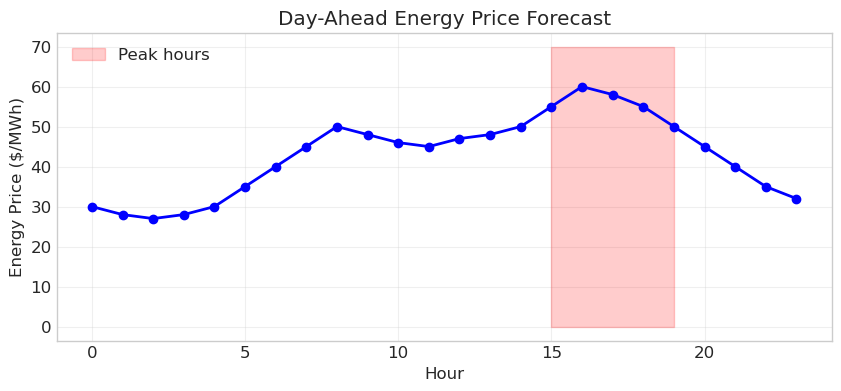


MATHEMATICAL FORMULATION

DECISION VARIABLES:
For each hour t = 0, ..., 23:
- p_g1[t] = Gas turbine 1 output (MW)
- p_g2[t] = Gas turbine 2 output (MW)
- p_c[t] = Coal plant output (MW)
- u_c[t] = Coal plant on/off (binary)
- p_b[t] = Battery discharge (positive) or charge (negative) (MW)
- e_b[t] = Battery energy level (MWh)
- v_c[t] = Coal plant startup indicator (binary)

OBJECTIVE FUNCTION:
Maximize: Profit = Revenue - Cost
= sum_t [price[t] × (p_g1[t] + p_g2[t] + p_c[t] + p_b[t])
        - 40 × (p_g1[t] + p_g2[t]) - 25 × p_c[t]]

Note: Battery has no fuel cost, only efficiency losses

CONSTRAINTS:

1. Generation Limits:
   0 ≤ p_g1[t] ≤ 50 for all t
   0 ≤ p_g2[t] ≤ 50 for all t
   100×u_c[t] ≤ p_c[t] ≤ 200×u_c[t] for all t
   -20 ≤ p_b[t] ≤ 20 for all t

2. Coal Plant Startup Logic:
   v_c[t] ≥ u_c[t] - u_c[t-1] for t > 0
   v_c[0] ≥ u_c[0] (assuming off initially)

3. Coal Plant Minimum Up Time (4 hours):
   sum(u_c[k] for k in t to t+3) ≥ 4×v_c[t]
   (If started at t, must run

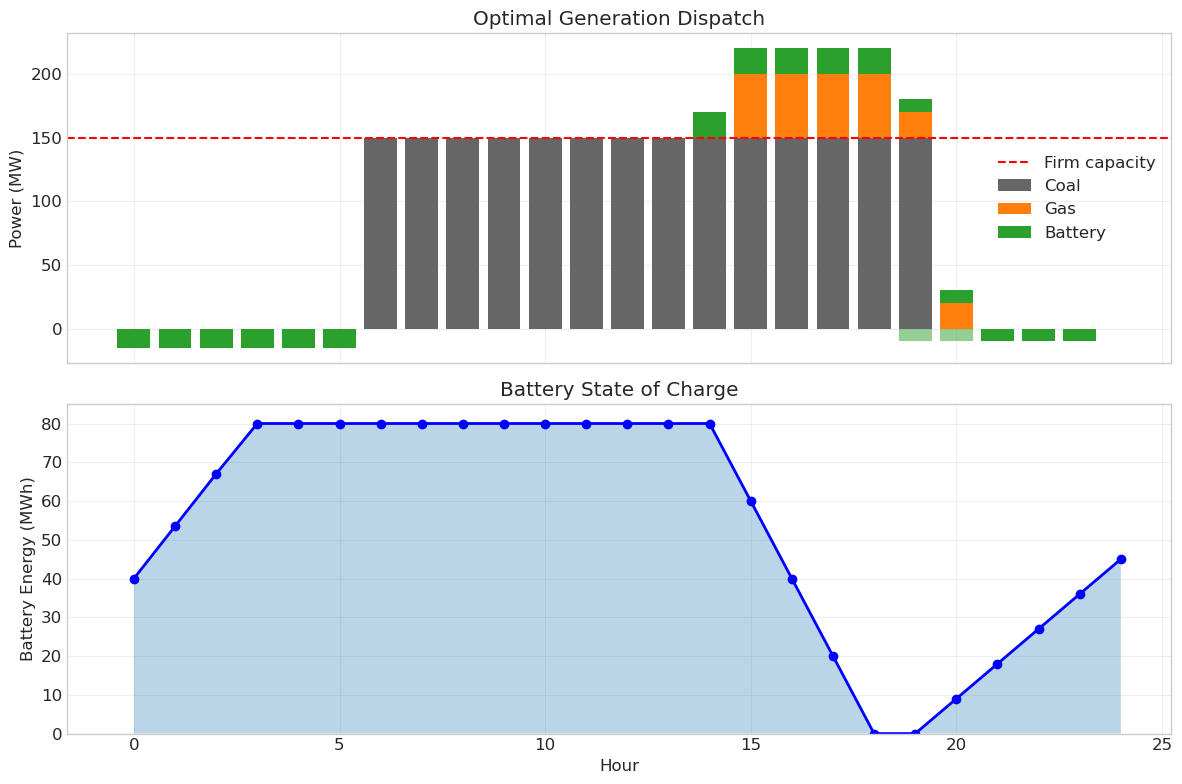

In [49]:
# Solution
print("Portfolio Optimization Problem")
print("="*60)

# Generate example price data
hours = range(24)
prices = [30, 28, 27, 28, 30, 35, 40, 45,  # Morning ramp
          50, 48, 46, 45, 47, 48, 50, 55,  # Midday to afternoon
          60, 58, 55, 50, 45, 40, 35, 32]  # Evening peak and decline

print("GIVEN DATA:")
print("\nGeneration Resources:")
print("- Gas Turbine 1: 0-50 MW, $40/MWh, fast start")
print("- Gas Turbine 2: 0-50 MW, $40/MWh, fast start") 
print("- Coal Plant: 0 or 100-200 MW, $25/MWh, 4-hour start")
print("- Battery: ±20 MW, 80 MWh capacity, 90% efficiency")

plt.figure(figsize=(10, 4))
plt.plot(hours, prices, 'b-', linewidth=2, marker='o')
plt.fill_between([15, 19], [0, 0], [70, 70], alpha=0.2, color='red', label='Peak hours')
plt.xlabel('Hour')
plt.ylabel('Energy Price ($/MWh)')
plt.title('Day-Ahead Energy Price Forecast')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("\n" + "="*60)
print("MATHEMATICAL FORMULATION")
print("="*60)

print("\nDECISION VARIABLES:")
print("For each hour t = 0, ..., 23:")
print("- p_g1[t] = Gas turbine 1 output (MW)")
print("- p_g2[t] = Gas turbine 2 output (MW)")
print("- p_c[t] = Coal plant output (MW)")
print("- u_c[t] = Coal plant on/off (binary)")
print("- p_b[t] = Battery discharge (positive) or charge (negative) (MW)")
print("- e_b[t] = Battery energy level (MWh)")
print("- v_c[t] = Coal plant startup indicator (binary)")

print("\nOBJECTIVE FUNCTION:")
print("Maximize: Profit = Revenue - Cost")
print("= sum_t [price[t] × (p_g1[t] + p_g2[t] + p_c[t] + p_b[t])")
print("        - 40 × (p_g1[t] + p_g2[t]) - 25 × p_c[t]]")
print("\nNote: Battery has no fuel cost, only efficiency losses")

print("\nCONSTRAINTS:")

print("\n1. Generation Limits:")
print("   0 ≤ p_g1[t] ≤ 50 for all t")
print("   0 ≤ p_g2[t] ≤ 50 for all t")
print("   100×u_c[t] ≤ p_c[t] ≤ 200×u_c[t] for all t")
print("   -20 ≤ p_b[t] ≤ 20 for all t")

print("\n2. Coal Plant Startup Logic:")
print("   v_c[t] ≥ u_c[t] - u_c[t-1] for t > 0")
print("   v_c[0] ≥ u_c[0] (assuming off initially)")

print("\n3. Coal Plant Minimum Up Time (4 hours):")
print("   sum(u_c[k] for k in t to t+3) ≥ 4×v_c[t]")
print("   (If started at t, must run for at least 4 hours)")

print("\n4. Battery Energy Balance:")
print("   e_b[t+1] = e_b[t] - p_b[t] + 0.9×min(0, p_b[t])")
print("   (Charging has 90% efficiency, discharging is 100%)")
print("   0 ≤ e_b[t] ≤ 80 for all t")
print("   e_b[0] = 40 (initial state)")
print("   e_b[24] ≥ 40 (end state requirement)")

print("\n5. Firm Capacity Requirement (hours 15-19):")
print("   p_g1[t] + p_g2[t] + p_c[t] + max(0, p_b[t]) ≥ 150")
print("   for t in {15, 16, 17, 18}")
print("   (Battery discharge counts, charging doesn't)")

print("\n6. Battery Power-Energy Relationship:")
print("   Can't discharge more than available energy")
print("   Can't charge beyond capacity")

print("\nPROBLEM CLASSIFICATION:")
print("- Mixed-Integer Linear Program (MILP)")
print("- Binary variables for coal plant operation")
print("- Continuous variables for power outputs")
print("- Linear constraints throughout")

print("\nSOLUTION INSIGHTS:")
print("- Gas turbines will run only during high-price hours (> $40/MWh)")
print("- Coal plant will run if average price over 4+ hours exceeds $25/MWh")
print("- Battery will charge during low prices and discharge during peaks")
print("- Firm capacity requirement may force suboptimal generation")

# Show example optimal strategy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Simulated optimal dispatch
coal_on = [0]*6 + [1]*14 + [0]*4  # On from hour 6-19
coal_output = [0 if not on else 150 for on in coal_on]
gas_output = [0]*15 + [50]*4 + [30]*2 + [0]*3  # Peak hours only
battery_output = [-15]*6 + [0]*8 + [20]*5 + [-10]*5  # Charge early, discharge peak

# Generation stack
ax1.bar(hours, coal_output, label='Coal', color='#666666')
ax1.bar(hours, gas_output, bottom=coal_output, label='Gas', color='#ff7f0e')
ax1.bar(hours, battery_output, bottom=[c+g if b>0 else c+g for c,g,b in zip(coal_output, gas_output, battery_output)],
        label='Battery', color='#2ca02c')

# Show battery charging as negative
charging = [b if b < 0 else 0 for b in battery_output]
ax1.bar(hours, charging, color='#2ca02c', alpha=0.5)

ax1.axhline(y=150, color='red', linestyle='--', label='Firm capacity')
ax1.set_ylabel('Power (MW)')
ax1.set_title('Optimal Generation Dispatch')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Battery state of charge
soc = [40]  # Initial
for b in battery_output:
    if b > 0:  # Discharging
        new_soc = soc[-1] - b
    else:  # Charging
        new_soc = soc[-1] - b * 0.9  # 90% efficiency
    soc.append(max(0, min(80, new_soc)))

ax2.plot(range(25), soc, 'b-', linewidth=2, marker='o')
ax2.fill_between(range(25), 0, soc, alpha=0.3)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Battery Energy (MWh)')
ax2.set_title('Battery State of Charge')
ax2.set_ylim(0, 85)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

This lesson introduced the fundamental concepts of optimization through power system examples. You learned to:

1. **Recognize optimization problems** in power system contexts, from economic dispatch to transmission planning

2. **Identify the three key components**: decision variables (what we control), objective function (what we optimize), and constraints (what we must satisfy)

3. **Classify problems by type**: linear vs. nonlinear, continuous vs. discrete, convex vs. non-convex - understanding that problem structure determines solution difficulty

4. **Formulate problems mathematically**, converting verbal descriptions into precise mathematical statements ready for computational solution

5. **Visualize simple problems graphically**, seeing how constraints create feasible regions and optimal solutions lie at boundaries

6. **Understand solution concepts** like feasibility, optimality, and sensitivity that help interpret results

## Key Takeaways

- **Formulation is crucial**: A well-formulated problem is halfway to solution. Poor formulation leads to wrong answers or computational intractability.

- **Problem structure matters**: Linear problems are reliably solvable even at large scale. Integer variables and nonlinearity add significant complexity.

- **Constraints define feasibility**: In power systems, constraints come from physics (power balance), equipment (ratings), and policy (reliability standards).

- **Optimal solutions often lie at boundaries**: This explains why generators often run at minimum or maximum, and why transmission lines congest.

- **Multiple objectives require trade-offs**: Cost, reliability, and environmental goals often conflict, requiring careful balancing.

## Next Steps

With these fundamentals established, you're ready to implement optimization problems computationally. In the next lesson, we'll explore Python tools for solving linear programs, starting with the economic dispatch and market clearing problems we formulated here.

Remember: every optimization problem in power systems started as a real operational challenge. By mastering these techniques, you'll be able to tackle new challenges as the grid evolves.